In [29]:
from sklearn.utils import shuffle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
def places():
    mini = 512
    maxi = 0
    list1 = shuffle(list(range(1,9)))
    list2 = shuffle(list(range(1,9)))
    list3 = shuffle(list(range(1,9)))
    #print(list1, list2, list3)
    for i in range(8):
        score = list1[i]*list2[i]*list3[i]
        #print(score)
        mini = min(mini, score)
        maxi = max(maxi, score)
    return mini, maxi

In [31]:
win_scores = []
lose_scores = []
for i in range(10000000):
     minny, verstappen = places()
     win_scores.append(minny)
     lose_scores.append(verstappen)
df = pd.DataFrame(list(zip(win_scores, lose_scores)), columns = ['max_win_score', 'min_losing_score'])
df.tail()

,max_win_score,min_losing_score
9999995,6,288
9999996,8,384
9999997,7,252
9999998,4,336
9999999,2,392


In [32]:
df2 = df[['max_win_score']].groupby(['max_win_score']).size().reset_index(name='win_count')
df3 = df[['min_losing_score']].groupby(['min_losing_score']).size().reset_index(name='lose_count')
df4 = df[['max_win_score', 'min_losing_score']].groupby(['max_win_score', 'min_losing_score']).size().reset_index(name = 'score_count')
# df_test = df.groupby('max_win_score')['max_win_score'].size().reset_index(name='win_count')
# df_test.head()

Text(114.0, 0.5, 'Winning Score')

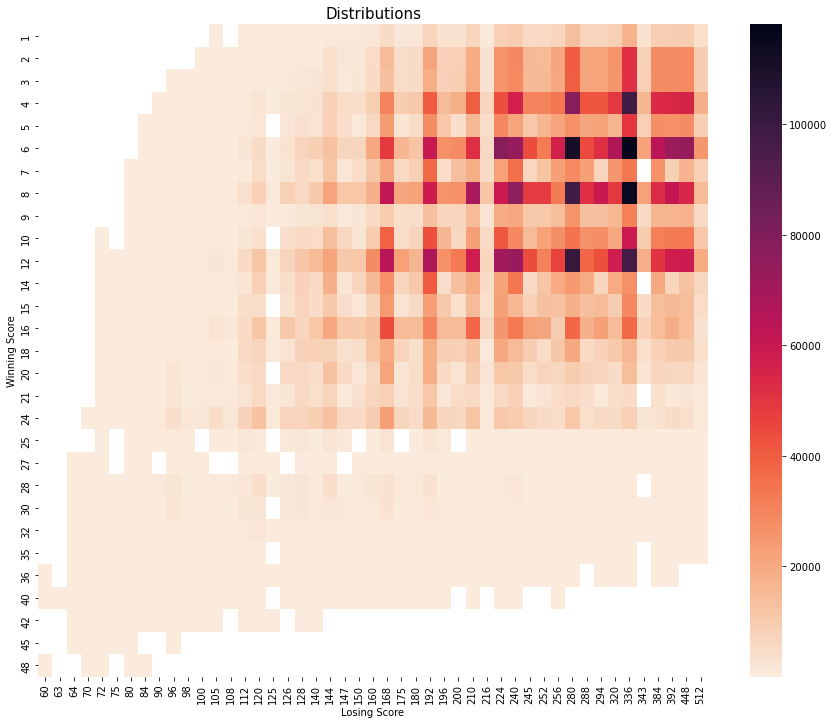

In [33]:
heatmap_data = pd.pivot_table(df4, values = 'score_count', index = 'max_win_score', columns = 'min_losing_score')
plt.figure(figsize=(15,12))
sns.heatmap(heatmap_data, cmap = "rocket_r")
plt.title("Distributions", fontsize = 15)
plt.xlabel('Losing Score') 
plt.ylabel('Winning Score') 

[Text(0, 0.5, 'Winning Score')]

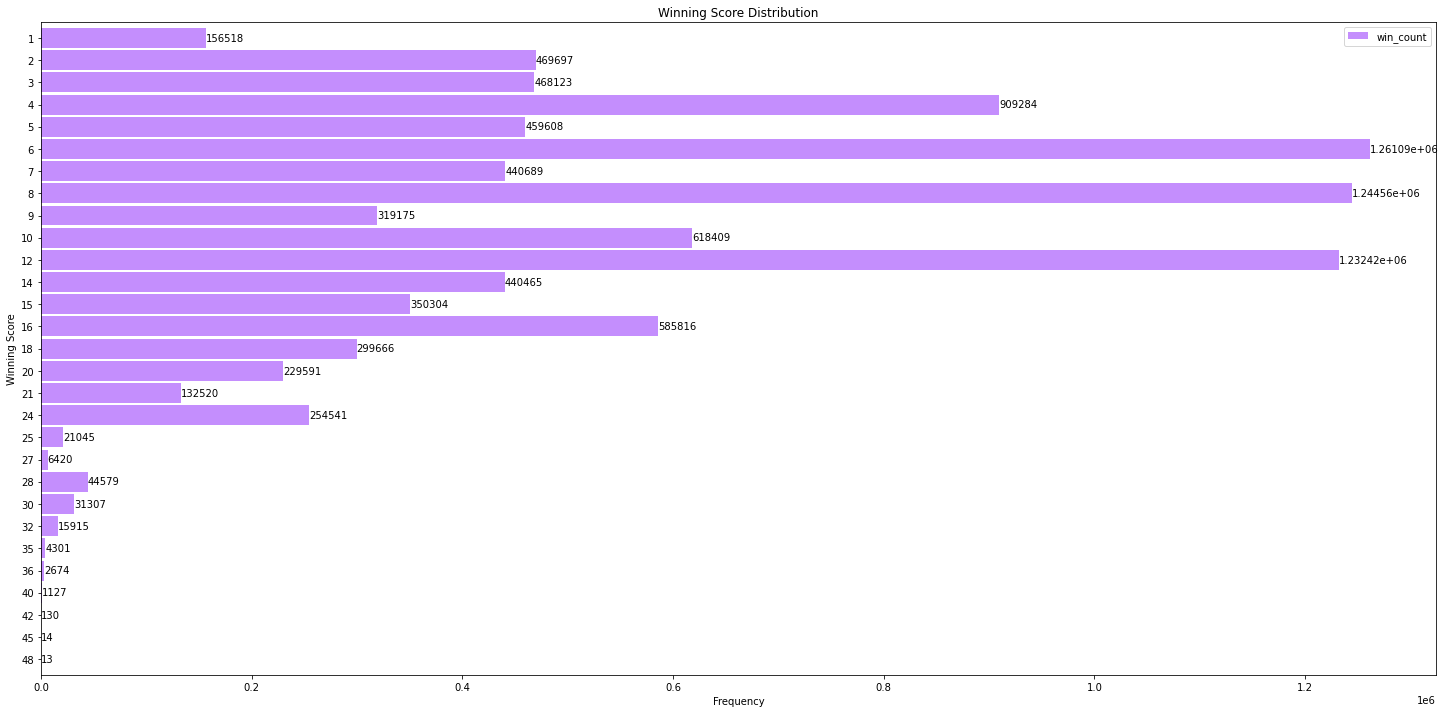

In [34]:
ax = df2.plot.barh(x='max_win_score', y='win_count', figsize = (25,12), color = "#c48efd", width = 0.9)
ax.bar_label(ax.containers[0])
ax.invert_yaxis()
ax.set(title = "Winning Score Distribution")
ax.set(xlabel = 'Frequency')
ax.set(ylabel = 'Winning Score')

[Text(0, 0.5, 'Losing Score')]

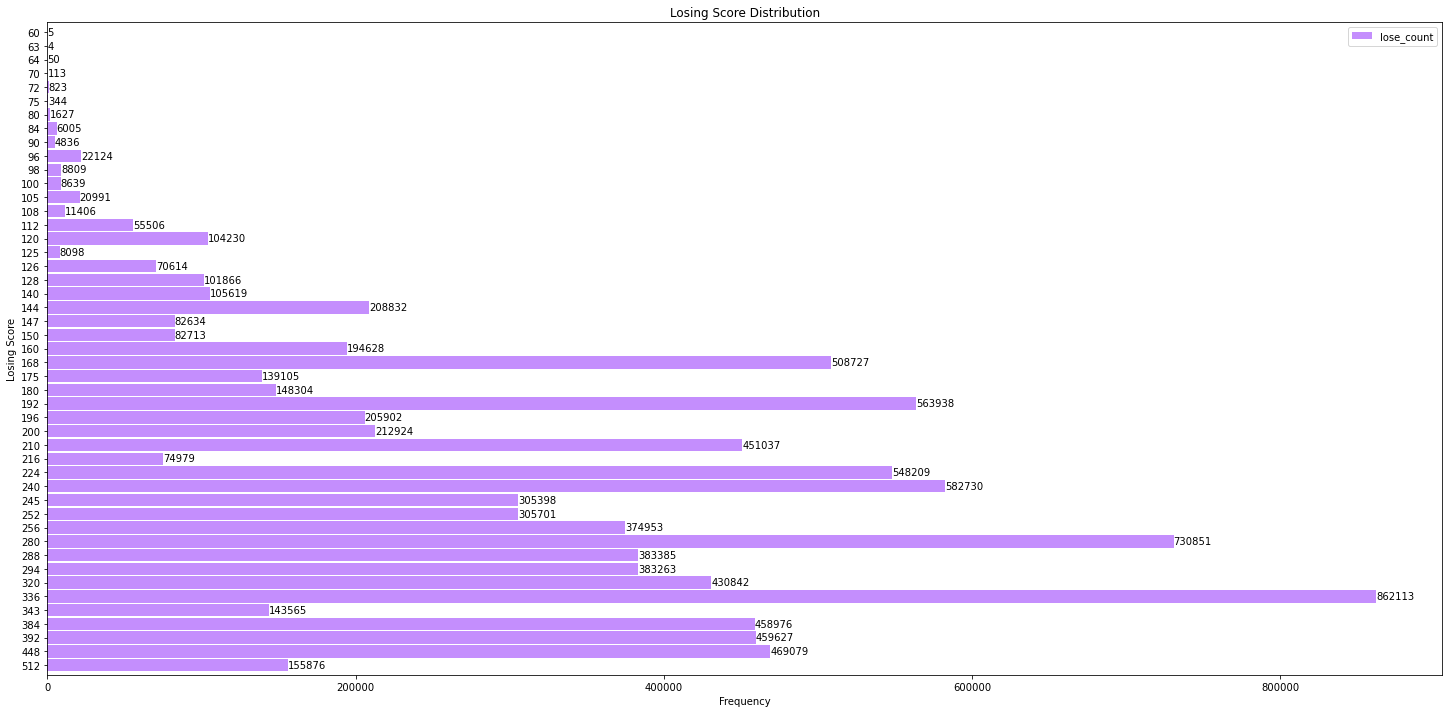

In [35]:
ax = df3.plot.barh(x='min_losing_score', y='lose_count', figsize = (25,12), color = "#c48efd", width = 0.9)
ax.bar_label(ax.containers[0])
ax.invert_yaxis()
ax.set(title = "Losing Score Distribution")
ax.set(xlabel = 'Frequency')
ax.set(ylabel = 'Losing Score')